In [51]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns

In [36]:
df=pd.read_csv(r"C:\Users\Abel\Downloads\50_Startups.csv")

In [37]:
df.head()

,RD,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


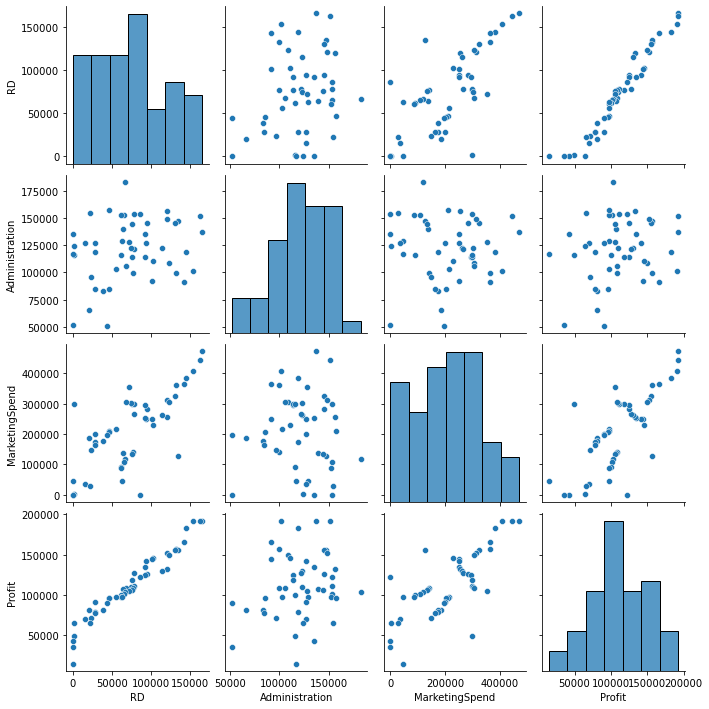

In [53]:
sns.pairplot(df)

In [82]:
#As per question r sqaure values according to transformation
model1=smf.ols("Profit~RD+Administration+MarketingSpend",data=df).fit()
model1.rsquared


0.9507459940683246

In [42]:
model2=smf.ols("Profit~np.sqrt(RD+Administration+MarketingSpend)",data=df).fit()
model2.rsquared

0.7396453820962448

In [43]:
model3=smf.ols("Profit~np.log(RD+Administration+MarketingSpend)",data=df).fit()
model3.rsquared

0.668967613655554

In [87]:
model4=smf.ols("Profit~(RD+Administration+MarketingSpend)**2",data=df).fit()
model4.rsquared

0.9533691650433282

In [99]:
t=pd.DataFrame({'Model1':[0.9507459940683246],
              'Model2':[0.7396453820962448],
              'Model3':[0.668967613655554],
              'Model4':[0.9533691650433282]})
t.index=['rsquared']
t

,Model1,Model2,Model3,Model4
rsquared,0.950746,0.739645,0.668968,0.953369


In [ ]:
#Here we get to know Model4 has more r square value so we will predict using Model4

In [95]:
data=pd.DataFrame({'RD':[165349.20],'Administration':[136897.80],'MarketingSpend':[471784.10]})

In [96]:
model4.predict(data)

0    190397.793997
dtype: float64